# Pergunta fundamental
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/<usuario>/<repo>/blob/<branch>/<caminho>/notebook.ipynb
)

Como podemos visualizar a forma como nossos dados se espalham e se conectam, tanto numericamente quanto no espaço?"

Nesta aula, vamos explorar três novos contextos de visualização:
1.  **Relações:** Entender como duas ou mais variáveis se comportam juntas.
2.  **Distribuições:** Analisar como os dados de uma única variável estão distribuídos.
3.  **Mapas:** Visualizar padrões geográficos em dados.

## 1. Relações: O Gráfico de Dispersão (Scatter Plot)

Quando queremos investigar a relação entre duas variáveis numéricas, o gráfico de dispersão é a nossa principal ferramenta. Ele nos ajuda a responder perguntas como: "**Será que a altura de uma pessoa tem relação com o seu peso?**" ou "**O aumento do investimento em marketing está relacionado ao aumento nas vendas?**".

O principal objetivo deste gráfico é nos ajudar a identificar visualmente os padrões de **correlação** entre as variáveis, observando tanto sua **direção** quanto sua **força**.

<table>
  <tr>
    <td style="text-align:center; padding-right:12px;">
      <img src="https://www.tableau.com/sites/default/files/2022-06/scatter-3.png" width="300"><br>Correlação nula
    </td>
    <td style="text-align:center; padding-right:12px;">
      <img src="https://www.tableau.com/sites/default/files/2022-06/scatter-4.png" width="300"><br>Correlação positiva
    </td>
    <td style="text-align:center;">
      <img src="https://www.tableau.com/sites/default/files/2022-06/scatter-5.png" width="300"><br>Correlação negativa
    </td>
  </tr>
</table>

* Uma **correlação positiva** ocorre quando ambas as variáveis se movem na mesma direção. A **força** dessa correlação depende do quão próximos os pontos estão de uma linha imaginária: se estiverem bem agrupados, a correlação é **forte**; se estiverem mais espalhados, é **fraca**.

* Uma **correlação negativa** ocorre quando as variáveis se movem em direções opostas. Da mesma forma, pode ser **forte** ou **fraca**.

* Uma **correlação nula** significa que não há um padrão claro de relação entre as variáveis.

Além disso, este gráfico é excelente para identificar **outliers**: pontos que estão muito distantes do padrão principal e que merecem uma investigação especial.

É fundamental lembrar que **correlação não é sinônimo de causalidade**. Os gráficos de dispersão mostram se e como as variáveis se movem juntas, mas não necessariamente respondem por que isso acontece.

### **Exemplo**: Conjunto de dados Penguins

![Figura](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/gorman-penguins.jpg)

O [dataset](https://lauranavarroviz.wordpress.com/2020/08/01/palmer-penguins/) contém dados de 344 pinguins de 3 espécies diferentes, coletados em 3 ilhas no Arquipélago de Palmer, na Antártida e apresenta as seguintes características:

* **`species`**: A espécie do pinguim (Adelie, Chinstrap, ou Gentoo). Esta será nossa principal variável para agrupar e comparar os dados.
* **`island`**: A ilha onde o pinguim foi observado (Torgersen, Biscoe, ou Dream).
* **`bill_length_mm`**: O comprimento do bico do pinguim em milímetros.
* **`bill_depth_mm`**: A altura (ou profundidade) do bico do pinguim em milímetros.
* **`flipper_length_mm`**: O comprimento da nadadeira em milímetros.
* **`body_mass_g`**: A massa corporal (peso) do pinguim em gramas.
* **`sex`**: O sexo do pinguim (Macho ou Fêmea).

Com base nessas colunas, podemos formular algumas perguntas de investigação que nos guiarão na criação dos gráficos:

1.  **Relação entre Medidas:** Será que existe uma relação entre o comprimento e a altura do bico dos pinguins? Pinguins com bicos mais longos também têm bicos mais altos?
2.  **Diferenças entre Espécies:** As características físicas (como peso, tamanho do bico, comprimento da nadadeira) são visivelmente diferentes entre as três espécies?
3.  **Influência da Localização:** Será que os pinguins da mesma espécie apresentam características diferentes dependendo da ilha em que vivem?

Nossa primeira pergunta é exatamente o que um **gráfico de dispersão** é projetado para responder. Vamos construir um para visualizar a relação entre o comprimento (`bill_length_mm`) e a altura (`bill_depth_mm`) do bico.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:

plt.figure(figsize=(14, 5))
sns.set_theme(style="whitegrid")
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Figure size 1400x500 with 0 Axes>

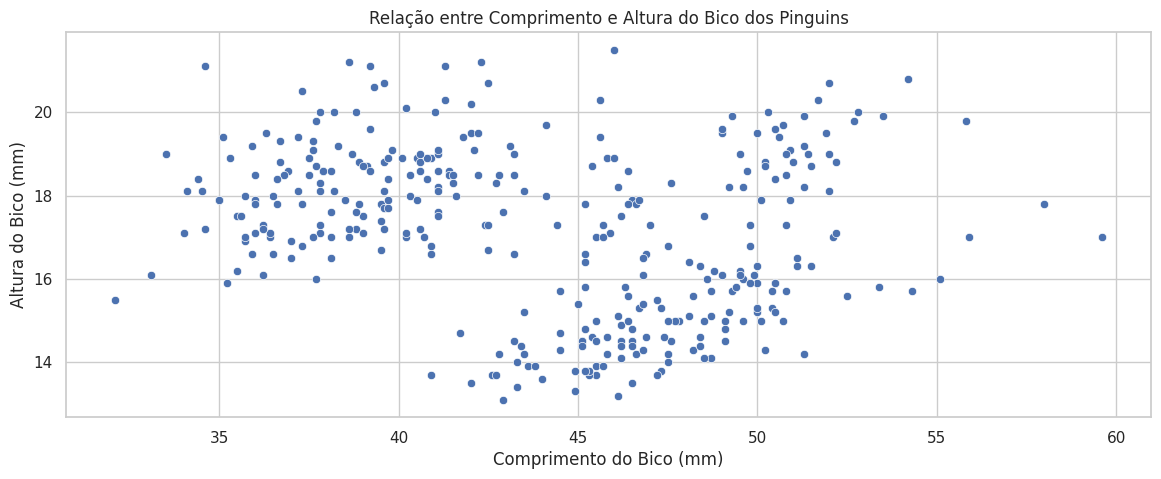

In [41]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

plt.title('Relação entre Comprimento e Altura do Bico dos Pinguins')
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Altura do Bico (mm)')
plt.show()

### 1.1. Análise Inicial do Gráfico

Observando o gráfico acima, vemos a "nuvem" de pontos que representa cada pinguim.

A primeira vista, a relação não é tão óbvia. A nuvem de pontos é bem dispersa, o que sugere que, ao olharmos para todos os pinguins juntos, a correlação pode ser fraca ou inexistente.

Isso é comum em análises de dados e geralmente indica que pode haver subgrupos com comportamentos diferentes dentro do nosso conjunto de dados. Será que as espécies de pinguins se comportam de maneira diferente?

Vamos aprimorar nosso gráfico adicionando uma terceira dimensão à análise, a **espécie**, usando cores para diferenciar os pontos.

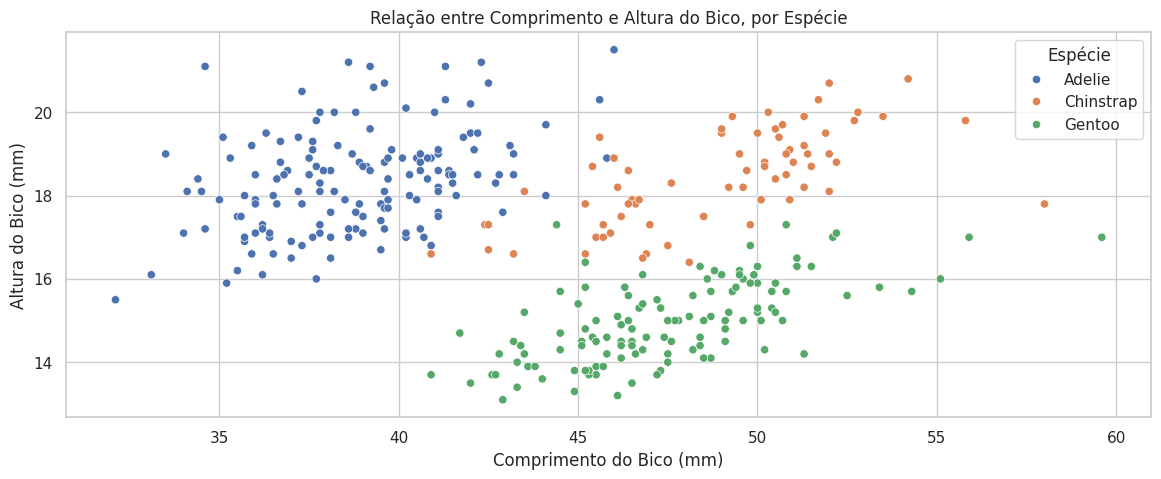

In [42]:
plt.figure(figsize=(14, 5))

# Adicionando a variável hue='species' para colorir os pontos
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

plt.title('Relação entre Comprimento e Altura do Bico, por Espécie')
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Altura do Bico (mm)')
plt.legend(title='Espécie')
plt.show()

### 1.2. Análise Melhorada

Ao adicionar a cor para representar cada espécie, agora podemos ver claramente que:

1.  **Existem 3 Grupos Distintos (Clusters):** Cada cor representa um agrupamento claro, mostrando que as espécies de pinguins têm características de bico bem diferentes umas das outras.
2.  **Correlações Positivas Dentro dos Grupos:** Dentro de cada espécie (cada cor), agora podemos observar uma **correlação positiva** muito mais clara. Por exemplo, para os pinguins da espécie Adelie (azul), aqueles com bicos mais longos também tendem a ter bicos mais altos. O mesmo padrão se repete para as outras espécies.
3.  **Insights Imediatos:** A espécie Gentoo (verde) se destaca por ter, em geral, bicos mais longos e menos altos que as demais.

Note que a simples adição de um elemento visual (a cor) pode transformar um gráfico confuso em uma fonte rica de insights, e isso nos permite contar uma história muito mais detalhada e precisa com nossos dados. Discutiremos depois sobre os elementos pré-atentivos.

## 2. Distribuições: Histogramas e Box Plots

Até agora, focamos em como duas variáveis se relacionam. Mas e quando queremos entender as características de **uma única variável**? Como os valores dela se espalham? Qual é a faixa de valores mais comum?

É aqui que entram os gráficos de **distribuição**. Eles são essenciais para responder a perguntas como:
* "Qual é a distribuição de idades dos meus clientes?"
* "A maior parte dos pinguins tem nadadeiras longas ou curtas?"

### 2.1. Histograma: Vendo a Frequência dos Dados

O histograma agrupa os dados em **"caixas" (bins)** de valores e usa barras para mostrar quantos pontos de dados caem em cada caixa. Ele é perfeito para visualizar a forma da distribuição dos seus dados.

Os bins são os intervalos nos quais os dados são agrupados. A altura de cada barra no histograma representa a frequência (ou contagem) de dados que caem dentro daquele intervalo. A escolha do número de bins é um equilíbrio:

* **Poucos Bins**: Se usarmos poucas caixas, o gráfico fica muito generalizado. Podemos perder detalhes importantes e padrões sutis, como a bimodalidade existente nos dados dos pinguins. A visão fica "embaçada".

* **Muitos Bins**: Se usarmos caixas demais, o gráfico pode ficar muito "ruidoso" e cheio de picos e vales que não representam a distribuição real, mas sim flutuações aleatórias. A visão fica "granulada" demais.

Não existe um número mágico de bins, e as bibliotecas geralmente fazem uma boa estimativa inicial. No entanto, é uma ótima prática como analista de dados experimentar diferentes valores para garantir que você está vendo a história real por trás dos dados.

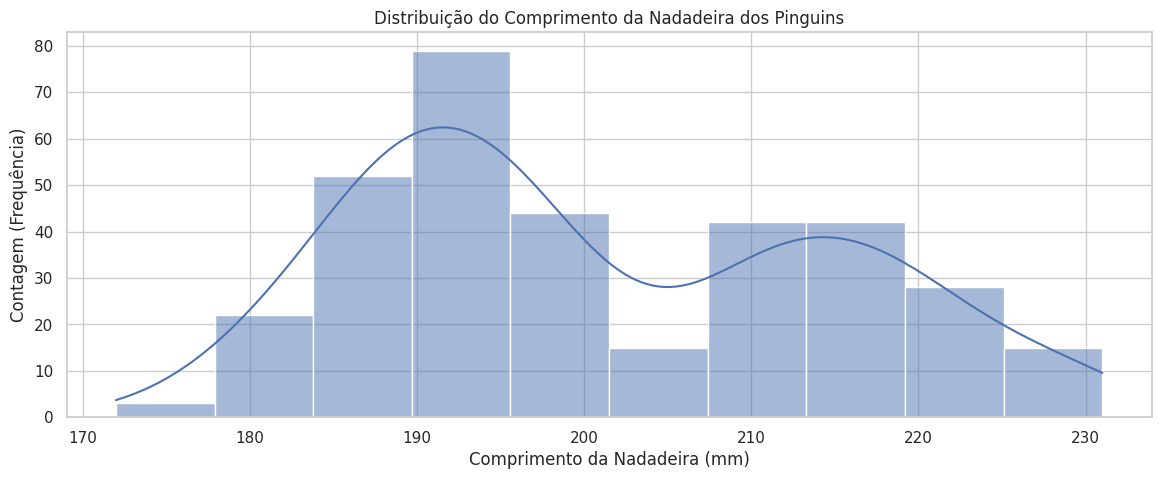

In [43]:
plt.figure(figsize=(14, 5))

sns.histplot(data=penguins, x="flipper_length_mm", kde=True)
plt.title('Distribuição do Comprimento da Nadadeira dos Pinguins')
plt.xlabel('Comprimento da Nadadeira (mm)')
plt.ylabel('Contagem (Frequência)')

plt.show()

### 2.2. Análise do Histograma

O histograma acima nos mostra a distribuição do comprimento das nadadeiras de todos os pinguins do nosso dataset.

Podemos observar que:
* A maioria dos pinguins tem nadadeiras com comprimento entre 180mm e 230mm.
* A distribuição não parece ser uma curva de sino perfeita. Na verdade, ela parece ter **dois picos**, um em torno de 190mm e outro, maior, em torno de 215mm. Esse padrão é chamado de **distribuição bimodal**.

Uma distribuição com mais de um pico, como esta, é uma forte evidência de que existem subgrupos distintos misturados nos nossos dados. Já temos uma suspeita de quem são esses grupos, certo?

Para confirmar e comparar as distribuições entre as espécies, vamos usar nossa próxima ferramenta: o **Box Plot**.

### 2.3. Box Plot: Comparando Distribuições Lado a Lado

O histograma sugeriu que temos grupos diferentes em nossos dados. Para investigar isso, o **Box Plot (ou Diagrama de Caixa)** é a ferramenta ideal. Ele resume a distribuição de uma variável em cinco pontos principais (mínimo, primeiro quartil, mediana, terceiro quartil e máximo) e é extremamente eficaz para comparar visualmente as distribuições de uma variável entre diferentes categorias.

Vamos usá-lo para responder à pergunta: "A distribuição do comprimento da nadadeira é diferente para cada espécie de pinguim?"

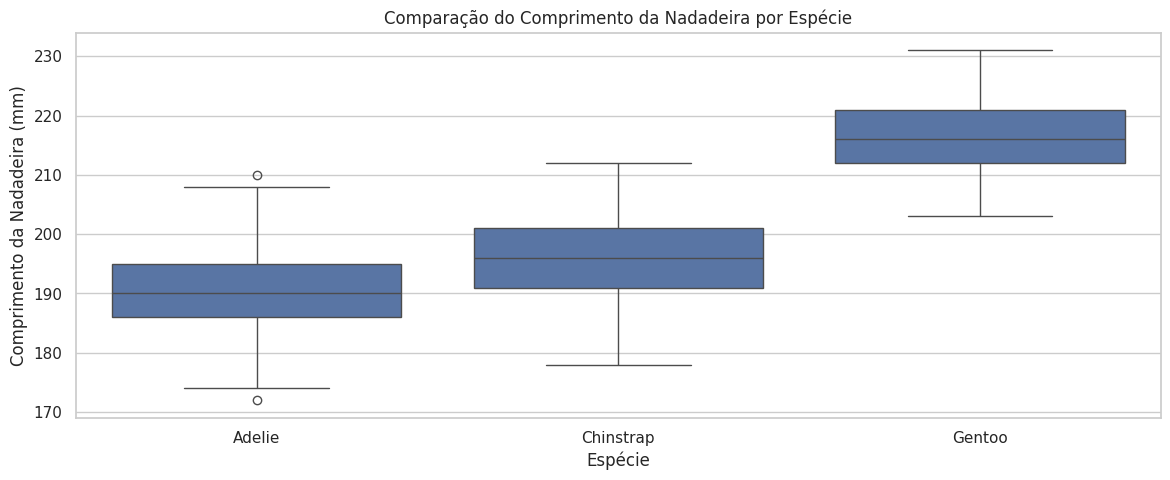

In [44]:
plt.figure(figsize=(14, 5))

# No eixo X colocamos a nossa categoria (species)
# No eixo Y colocamos a nossa variável numérica (flipper_length_mm)
sns.boxplot(data=penguins, x="species", y="flipper_length_mm")

plt.title('Comparação do Comprimento da Nadadeira por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Nadadeira (mm)')

plt.show()

Enquanto o histograma mostra a forma completa, o box plot foca em cinco estatísticas-chave para comparar grupos de forma rápida e eficiente.

Uma imagem anotada aqui seria ideal para ilustrar estes pontos:

- **A Caixa (O "Coração" dos Dados)**:
  - **Mediana (ou Q2)**: A linha **dentro** da caixa. Ela representa o valor central: 50% dos dados estão abaixo dela e 50% estão acima.
  - **Primeiro Quartil (Q1)**: A borda **inferior** da caixa. Representa o valor abaixo do qual estão 25% dos dados.
  - **Terceiro Quartil (Q3)**: A borda **superior** da caixa. Representa o valor abaixo do qual estão 75% dos dados.
  - **Intervalo Interquartil (IQR)**: A altura da caixa (calculada como Q3 - Q1). Ela contém os 50% centrais dos dados e é uma ótima medida de dispersão (variabilidade). Uma caixa mais alta significa dados mais espalhados.

- **Os "Bigodes" (Whiskers)**:
  - As linhas que se estendem para cima e para baixo da caixa. Elas mostram o alcance dos dados considerados "típicos". Por padrão, elas se estendem até 1.5 vez o tamanho do IQR a partir da borda da caixa (Q1 e Q3).

- **Outliers**:
  - Os pontos individuais que aparecem **fora** dos bigodes. Eles representam valores atípicos ou extremos que podem merecer uma investigação mais aprofundada.

Ao comparar box plots lado a lado, como fizemos com as espécies de pinguins, podemos comparar rapidamente não apenas as medianas (tendência central), mas também a dispersão (tamanho da caixa) e a presença de outliers em cada grupo.

### 2.4. Análise do Box Plot

Exatamente como suspeitávamos! O box plot remove qualquer dúvida e nos mostra claramente que:

1.  **Distribuições Diferentes:** Cada espécie de pinguim tem uma distribuição de comprimento de nadadeira completamente distinta. A sobreposição entre elas é mínima.
2.  **Confirmação da Bimodalidade:** Aquele padrão de "dois picos" que vimos no histograma era, na verdade, a sobreposição das distribuições das espécies Adelie e Chinstrap (mais à esquerda) com a distribuição da espécie Gentoo (bem à direita).
3.  **Insights Rápidos:** Podemos ver que a espécie **Gentoo** tem, em média (representada pela linha no meio da caixa), nadadeiras significativamente mais longas que as outras duas. Também podemos notar que a variabilidade (o tamanho da caixa) do comprimento das nadadeiras na espécie Adelie é a menor de todas.

O box plot foi a ferramenta perfeita para dissecar o histograma inicial e nos dar uma compreensão muito mais clara e segmentada dos nossos dados.

## Exercício

1. **Analisar a relação entre Nadadeiras e Massa Corporal**: Crie um gráfico de dispersão (scatterplot) que mostre a relação entre o comprimento da nadadeira (flipper_length_mm) no eixo X e a massa corporal (body_mass_g) no eixo Y.
   1. **Responda**: Que tipo de correlação você observa? É forte ou fraca? Positiva ou negativa?

2. **Análise por Espécie**: Pegue o gráfico anterior e adicione a variável species como um parâmetro de cor (hue).

    1. **Responda**: O padrão de correlação que você observou antes se mantém para todas as espécies? A espécie Gentoo (verde) continua se destacando das demais? Como?

3. **Comparando Bicos por Ilha**. Use um box plot (boxplot) para comparar a distribuição do comprimento do bico (bill_length_mm) entre as três ilhas (island).
    1. **Responda**: Existe alguma diferença visível na distribuição do comprimento do bico dependendo da ilha? Qual ilha parece ter os pinguins com bicos mais longos em média?

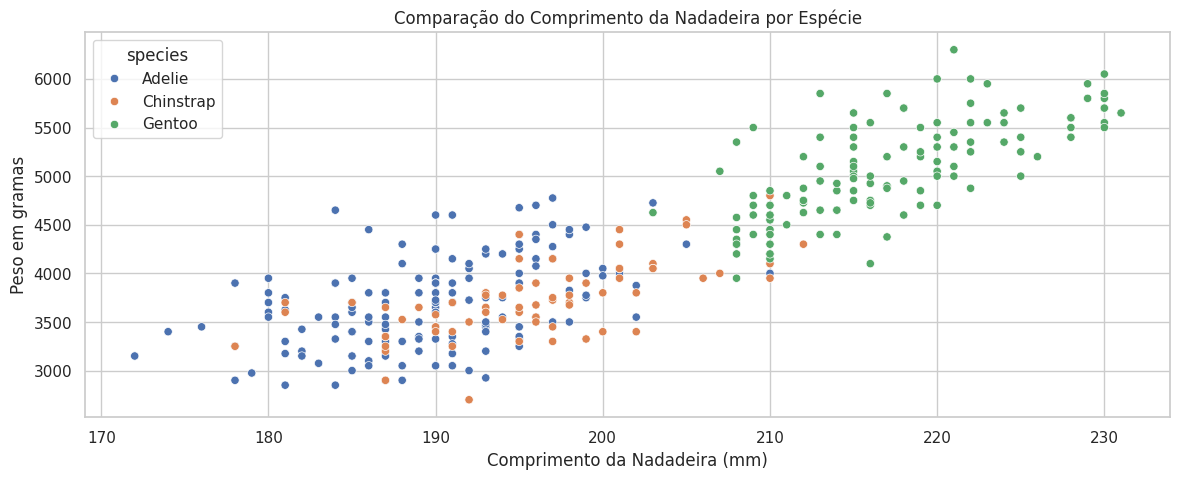

In [45]:
plt.figure(figsize=(14, 5))

sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue='species')

plt.title('Comparação do Comprimento da Nadadeira por Espécie')
plt.xlabel('Comprimento da Nadadeira (mm)')
plt.ylabel('Peso em gramas')

plt.show()

2) Sim, a mesma correlação POSITIVA se mantém para as outras espécies, a espécie verde é a que mais se destaca possuindo maiores comprimeiros de nadedeira e maiores pesos


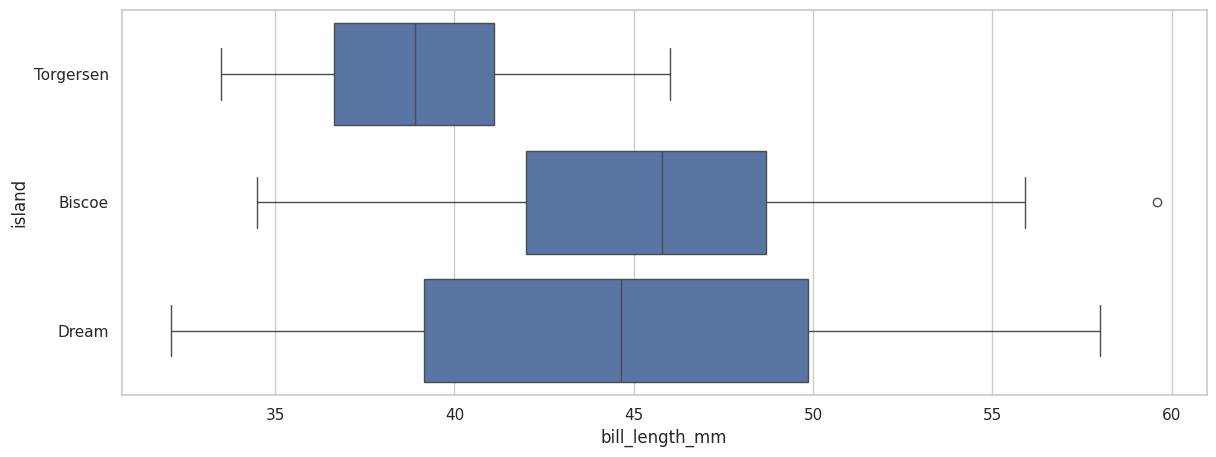

In [46]:
plt.figure(figsize=(14, 5))

# No eixo X colocamos a nossa categoria (species)
# No eixo Y colocamos a nossa variável numérica (flipper_length_mm)
sns.boxplot(data=penguins, x="bill_length_mm", y="island")


plt.show()

3) Em média, a ilha Biscoe parece ter pinguins com os bicos mais longos, como indicado pela mediana mais alta no box plot. A distribuição do comprimento do bico nas ilhas Torgersen e Dream é visivelmente diferente, com a ilha Torgersen apresentando pinguins com bicos, em média, mais curtos e com menor variabilidade (caixa menor). Isso sugere que a localização geográfica (ilha) tem uma influência notável nas características físicas dos pinguins, especificamente no comprimento do bico.

## 3. Mapas

Até agora, nossos dados não tinham um contexto espacial. Mas e se quiséssemos responder perguntas como: "Qual a expectativa de vida em diferentes continentes?" ou "Quais estados brasileiros têm o maior PIB?".

Quando nossos dados têm uma dimensão geográfica, os **mapas** são a forma mais poderosa e intuitiva de visualizá-los. Podemos explorar a biblioteca `plotly.express` para criar mapas interativos.

### 3.1. Mapa Coroplético

O **Mapa Coroplético** permite colorir regiões inteiras. Ele é ótimo para visualizar taxas ou valores médios. Vamos refazer nosso exemplo do `gapminder` como ponto de partida.

In [47]:
import plotly.express as px

gapminder = px.data.gapminder()

gapminder_2007 = gapminder.query("year == 2007")

fig = px.choropleth(gapminder_2007,
                    locations="iso_alpha", # Código ISO de cada país
                    color="lifeExp", # Variável que definirá a cor
                    hover_name="country", # O que aparecerá ao passar o mouse
                    color_continuous_scale=px.colors.sequential.Plasma, # Escala de cores
                    title="Expectativa de Vida no Mundo em 2007")
fig.show()

### 3.2. Análise Detalhada

O mapa em questão não é apenas uma imagem colorida; é um retrato da saúde global em 2007, e nos conta uma história complexa de forma muito direta. Podemos quebrar a análise em partes:

**1. Legenda de Cores:**
Vemos que as cores mais escuras e roxas representam uma expectativa de vida mais baixa, enquanto as cores mais claras e amarelas indicam uma expectativa de vida mais alta. A escala vai de aproximadamente 40 a mais de 80 anos. Isso nos dá o "dicionário" para ler o mapa.

**2. Identificando Padrões Geográficos Globais:**
Com a legenda em mente, padrões geográficos saltam aos olhos imediatamente:
* **Contraste Continental:** Há um contraste nítido entre os continentes. A África Subsaariana se destaca com as cores mais escuras, indicando as menores expectativas de vida no mundo naquele ano. Em contrapartida, a Europa Ocidental, a América do Norte, a Austrália e o Japão brilham em amarelo, mostrando as maiores expectativas de vida.
* **Padrões Regionais:** Dentro dos continentes, também vemos nuances. Na América do Sul, países do cone sul como Chile e Argentina apresentam uma expectativa de vida maior que a de países como a Bolívia. A Ásia também mostra uma grande diversidade, com o Japão de um lado e países como o Afeganistão do outro.

**3. O Poder da Interatividade:**
Lembre-se que este não é um mapa estático. Use o seu mouse!

* **Passe o mouse sobre os países:** Ao fazer isso, uma "tooltip" (caixa de informação) aparece, mostrando o nome do país e o valor exato da expectativa de vida. Isso permite que você saia da análise geral e investigue dados específicos com precisão.
* **Use o zoom e arraste:** Você pode aproximar o mapa para focar em uma região específica, como a Europa, e comparar países vizinhos com mais facilidade.

**4. O Que o Mapa NÃO Mostra (Limitações):**
É igualmente importante entender as limitações. Este mapa mostra a **média nacional**. Ele esconde desigualdades internas. A expectativa de vida em uma região rica de um país pode ser drasticamente diferente da de uma região pobre, mas o mapa pinta o país inteiro com uma única cor. Como todo resumo, ele perde detalhes.

### Mapa de Bolhas: Mostrando Magnitude em Pontos Específicos

E se, em vez de uma taxa ou média (como a expectativa de vida), quiséssemos mostrar um valor total, como a população de um país ou o volume de vendas de uma loja?

Se usássemos um mapa coroplético para isso, poderíamos ser enganados pela visualização. Um estado grande com uma população pequena pareceria mais importante do que um estado pequeno e densamente povoado. Este é o **problema da distorção de área**.

Para resolver isso, usamos um **Mapa de Bolhas** (ou `scatter_geo`). Ele plota círculos em coordenadas específicas, onde o **tamanho** e/ou a **cor** da bolha representa uma variável, independentemente do tamanho geográfico da região.

**Por que usar um Mapa de Bolhas?**

1.  **Evita a Distorção de Área:** A principal vantagem é que o valor dos dados não é distorcido pelo tamanho do território. O que importa é o tamanho da bolha, não o do país ou estado.
2.  **Visualiza Múltiplas Dimensões:** Um mapa de bolhas é incrivelmente eficiente para mostrar várias informações de uma vez:
    * **Posição (Onde):** A latitude e longitude da bolha no mapa.
    * **Tamanho (Quanto):** O tamanho da bolha representa uma variável numérica (ex: população, PIB, vendas).
    * **Cor (Qual):** A cor da bolha pode representar uma categoria (ex: continente, tipo de produto) ou até mesmo outra variável numérica.

**Pontos de Atenção ao Usar Mapas de Bolhas:**

* **Sobreposição:** Em áreas com muitos pontos de dados próximos (como a Europa), as bolhas podem se sobrepor, dificultando a visualização. A interatividade (usar o zoom e o mouse) ajuda a mitigar esse problema.
* **Percepção de Tamanho:** Nós, humanos, não somos muito bons em comparar a área de círculos com precisão. Por isso, a legenda de tamanhos e o uso de tooltips (informações que aparecem com o mouse) são fundamentais.

O mapa de bolhas a seguir mostra a população dos países em 2007. Vamos usar a **posição** para o país, o **tamanho** para a população e a **cor** para o continente.

## Exercício

1. Crie um mapa de bolhas (px.scatter_geo) usando os dados de 2007. Configure os seguintes parâmetros:

   * locations = "iso_alpha"
   * size = "gdpPercap" (PIB per capita)
   * color = "continent"
   * hover_name = "country"
   * title = "PIB per Capita no Mundo em 2007"

    1. Quais continentes concentram os países com maior PIB per capita (bolhas maiores)?
    2. No mapa da aula, a China e a Índia tinham bolhas gigantes por causa de suas populações. Como elas aparecem neste mapa de PIB per capita? O que essa diferença de visualização nos ensina?

In [48]:
fig = px.scatter_geo(gapminder_2007,
                     locations="iso_alpha",
                     size="gdpPercap", # O tamanho da bolha será proporcional à população ('pop')
                     hover_name="country",
                     color="continent", # Vamos colorir por continente
                     title="PIP per Capita no Mundo em 2007",
                     projection="natural earth") # Um tipo de projeção de mapa diferente
fig.show()

Quais continentes concentram os países com maior PIB per capita (bolhas maiores)?

Os continentes da Europa, Américas (principalmente América do Norte) e Oceania (Austrália e Nova Zelândia) concentram a maioria dos países com maior PIB per capita, representados pelas bolhas de maior tamanho.

No mapa da aula, a China e a Índia tinham bolhas gigantes por causa de suas populações. Como elas aparecem neste mapa de PIB per capita? O que essa diferença de visualização nos ensina?

Neste mapa de PIB per capita, a China e a Índia aparecem com bolhas relativamente pequenas em comparação com os países de maior PIB per capita.

Essa diferença nos ensina que:

População vs. Riqueza Individual: Enquanto China e Índia têm populações enormes (o que as torna proeminentes no mapa de população), o PIB per capita (que é a riqueza média por pessoa) era consideravelmente menor em 2007 em comparação com países desenvolvidos.
O Poder da Variável Visual: A variável que escolhemos para definir o tamanho das bolhas muda completamente a história que o mapa conta. Usar a população destaca os países mais populosos, enquanto usar o PIB per capita destaca os países onde a riqueza por pessoa é maior. Isso reforça a importância de escolher a visualização e a variável correta para a pergunta que queremos responder.


## Referências

*   Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual
dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081